In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
def simulate(principal, time, year_interest, monthly_contribution):
    cumulative = []
    cumulative.append(principal)
    monthly = []
    for month in range(time):
        principal = principal*(1+(year_interest/12))
        cumulative.append(principal)
        monthly.append(month)
        principal += monthly_contribution
    return cumulative

def simulate(principal, time, year_interest, monthly_contribution):
    cumulative = []
    cumulative.append(principal)
    monthly = []
    for month in range(time):
        principal = principal*(1+(year_interest/12))
        cumulative.append(principal)
        monthly.append(month)
        principal += monthly_contribution
    return cumulative

In [3]:
payment_matrix = pd.DataFrame(index = range(0,55000,5000),columns=range(0,1050,50))
for i in payment_matrix.index:
    for j in payment_matrix.columns:
        print(i, j)
        payment_matrix.loc[i,j] = simulate(i,30*12,0.06,j)[-1]

0 0
0 50
0 100
0 150
0 200
0 250
0 300
0 350
0 400
0 450
0 500
0 550
0 600
0 650
0 700
0 750
0 800
0 850
0 900
0 950
0 1000
5000 0
5000 50
5000 100
5000 150
5000 200
5000 250
5000 300
5000 350
5000 400
5000 450
5000 500
5000 550
5000 600
5000 650
5000 700
5000 750
5000 800
5000 850
5000 900
5000 950
5000 1000
10000 0
10000 50
10000 100
10000 150
10000 200
10000 250
10000 300
10000 350
10000 400
10000 450
10000 500
10000 550
10000 600
10000 650
10000 700
10000 750
10000 800
10000 850
10000 900
10000 950
10000 1000
15000 0
15000 50
15000 100
15000 150
15000 200
15000 250
15000 300
15000 350
15000 400
15000 450
15000 500
15000 550
15000 600
15000 650
15000 700
15000 750
15000 800
15000 850
15000 900
15000 950
15000 1000
20000 0
20000 50
20000 100
20000 150
20000 200
20000 250
20000 300
20000 350
20000 400
20000 450
20000 500
20000 550
20000 600
20000 650
20000 700
20000 750
20000 800
20000 850
20000 900
20000 950
20000 1000
25000 0
25000 50
25000 100
25000 150
25000 200
25000 250
25000 30

In [4]:
payment_matrix = payment_matrix.astype(float)

In [5]:
binary = payment_matrix.applymap(lambda x: 0 if x < 1000000 else 1)

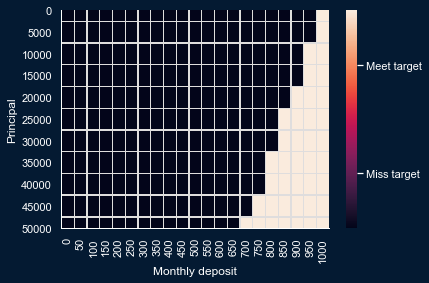

In [17]:
f = plt.figure()
ax = sns.heatmap(binary,linewidths=0.3, linecolor='#DFDDDD')

sns.set(rc={'figure.facecolor':'#041A32'})
ax.set_xlabel("Monthly deposit", color="white")
ax.set_ylabel("Principal", color="white")

sns.despine()
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('white')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['Miss target', 'Meet target'])
ax.tick_params(axis='y', which='both', colors='white', width=5)
ax.tick_params(axis='x', which='both', colors='white', width=5)
colorbar.ax.tick_params(colors="white")


In [ ]:
amounts_loan = simulate(42000,30*12, 0.05, 0)
amounts_invest = simulate(42000,30*12, 0.05, 0)
amounts_staggered = simulate(1000, 30*12, 0.05, 200)

In [ ]:
amounts_staggered

In [ ]:
days_loan = days_loan[:-1]
days_invest = days_invest[:-1]
amounts_loan = amounts_loan[:-1]
amounts_invest = amounts_loan[:-1]

In [ ]:
pay_towards = np.append(pay_towards, pay_towards[-1])
pay_towards = np.append(pay_towards, pay_towards[-1])

In [ ]:
np.round(pay_towards[0], 2)

In [ ]:
fig = plt.figure(figsize = (9,4))
ax = fig.add_axes([0.15,0.15,0.85,0.85])
ax.plot(np.array(range(len(amounts_invest))), pay_towards, label = "Cumulative monthly loan repayments (Tax)")
ax.plot(np.array(range(len(amounts_invest))), amounts_invest, label = "Lump investment (5.0%)")
ax.plot(np.array(range(len(amounts_invest))), amounts_staggered, label = "Monthly contribution investment (5.0%)")
ax.set_xlabel("Elapsed months")
ax.set_ylabel("Value")
# ax.fill_between(np.array(range(len(amounts_invest))), amounts_invest, pay_towards, alpha = 0.2)
ax.vlines(30*12, ymin=pay_towards[-1]+5000, ymax=amounts_invest[-1]-5000, ls='--', color = 'k')
ax.vlines(355, ymin=pay_towards[-1]+3000, ymax=amounts_staggered[-1]-7000, ls='--', color = 'k')
ax.annotate('Starting value = 42000', xy=(0, 42000),  xycoords='data', color = 'C1',
            xytext=(0.08, 0.43), textcoords='axes fraction',
            #arrowprops=dict(facecolor='C1', shrink=0.05),
            horizontalalignment='left', verticalalignment='top', rotation = 12
            )
ax.annotate('Starting value = 1000', xy=(0, 1000),  xycoords='data', color = 'C2',
            xytext=(0.1, 0.25), textcoords='axes fraction',
            #arrowprops=dict(facecolor='C2', shrink=0.05),
            horizontalalignment='left', verticalalignment='top', rotation = 14
            )
ax.annotate('Starting value = {}'.format(np.round(pay_towards[0], 2)), xy=(0, 0),  xycoords='data', color = 'C0',
            xytext=(0.5, 0.35), textcoords='axes fraction',
            #arrowprops=dict(facecolor='C0', shrink=0.05),
            horizontalalignment='left', verticalalignment='top', rotation = 16
            )
ax.annotate('PROFIT', xy=(300, 100000),  xycoords='data', color = 'k',
            xytext=(0.96, 0.8), textcoords='axes fraction',
            horizontalalignment='left', verticalalignment='top', rotation = 270
            )
plt.legend();
plt.grid(axis='y')
fig.savefig('loan_vs_invest.png', dpi=600)

In [ ]:
amounts_invest[-1]